<a href="https://colab.research.google.com/github/bharathreddy-2802/BharathSimhaReddy_INFO5731_Fall2024/blob/main/Samala_BharathSimhaReddy_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.3 MB/s eta 0:00:00


In [2]:
# Uninstall any existing Gensim installation and reinstall necessary libraries
!pip uninstall -y gensim
!pip install numpy scipy pandas smart_open
!pip cache purge
!pip install gensim
!pip install pyLDAvis==3.3.1
!pip install spacy
!python -m spacy download en_core_web_sm

# Importing libraries
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
import pandas as pd
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# New sample text data
sample_data = [
    "The government announced a new initiative to improve healthcare.",
    "Tesla's latest electric car model was unveiled with impressive features.",
    "The upcoming elections are expected to shape the future of the country.",
    "New advances in AI are transforming industries worldwide.",
    "A popular singer released an album that topped the charts immediately.",
    "Research on renewable energy sources is becoming more prominent.",
    "Wildfires have become more frequent due to climate change.",
    "Scientists discovered a new exoplanet that may support life.",
    "The stock market experienced significant fluctuations last week.",
    "Remote work policies are changing the landscape of corporate offices."
]

# Load Spacy English model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text data
def preprocess_texts(texts):
    processed_texts = []
    for doc in texts:
        tokens = [token.lemma_ for token in nlp(doc.lower()) if not token.is_stop and not token.is_punct]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess the sample data
preprocessed_data = preprocess_texts(sample_data)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Function to calculate coherence scores and identify the optimal number of topics
def calculate_coherence(corpus, dictionary, texts, start=2, limit=10, step=1):
    coherence_scores = []
    lda_models = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=10,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )
        lda_models.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
    return lda_models, coherence_scores

# Compute coherence values and determine the optimal number of topics
lda_models, coherence_scores = calculate_coherence(corpus, dictionary, preprocessed_data, start=2, limit=10, step=1)
optimal_index = coherence_scores.index(max(coherence_scores))
optimal_model = lda_models[optimal_index]
optimal_num_topics = optimal_model.num_topics

print(f'Optimal number of topics: {optimal_num_topics}')

# Build the final LDA model using the optimal number of topics
final_lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=optimal_num_topics,
    random_state=100,
    update_every=1,
    chunksize=10,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

#print topics from the final model
pprint(final_lda_model.print_topics())

#Summerize each topic based on keywords
for idx, topic in final_lda_model.print_topics(-1):
  print(f"Topic {idx + 1}: {topic}")

#Optional: visualize topics using pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(final_lda_model, corpus, dictionary)
lda_vis

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Files removed: 12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.1 MB/s eta 0:00:00
✔ Download and

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.139959 -0.079360       1        1  19.255470
2      0.157233 -0.113309       2        1  17.630146
0      0.023898  0.120576       3        1  13.144905
1      0.018430  0.060744       4        1  11.510072
7     -0.046436 -0.021050       5        1   9.877079
4      0.014641  0.035483       6        1   9.877079
5     -0.046436 -0.021050       7        1   9.877069
8      0.011906  0.021697       8        1   8.246966
6      0.006724 -0.003731       9        1   0.581216, topic_info=         Term      Freq     Total Category  logprob  loglift
5         new  2.000000  2.000000  Default  30.0000  30.0000
37     change  1.000000  1.000000  Default  29.0000  29.0000
33  prominent  0.000000  0.000000  Default  28.0000  28.0000
32     energy  0.000000  0.000000  Default  27.0000  27.0000
35   research  0.000000  0.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
54     office  0.006113  1.091795   Topic9  -4.0604  -0.0374
55     policy  0.006113  1.091795   Topic9  -4.0604  -0.0374
0    announce  0.006113  1.112124   Topic9  -4.0604  -0.0558
3     improve  0.006113  1.112124   Topic9  -4.0604  -0.0558
19   upcoming  0.006113  1.112124   Topic9  -4.0604  -0.0558

[405 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
20        7  1.042259      advance
21        7  1.042259           ai
25        4  1.002471        album
0         1  0.899180     announce
6         3  0.970477          car
37        2  0.585381       change
26        4  1.002471        chart
38        2  0.915923      climate
52        2  0.915923    corporate
14        1  0.899180      country
41        5  1.042258     discover
15        1  0.899180     election
7         3  0.970477     electric
42        5  1.042258    exoplanet
16        1  0.899180       expect
46        6  1.042258   experience
8         3  0.970477      feature
47        6  1.042258  fluctuation
39        2  0.915923     frequent
17        1  0.899180       future
1         1  0.899180   government
2         1  0.899180   healthcare
27        4  1.002471  immediately
9         3  0.970477   impressive
3         1  0.899180      improve
22        7  1.042259     industry
4         1  0.899180   initiative
53        2  0.915923    landscape
10        3  0.970477         late
43        5  1.042258         life
48        6  1.042258       market
11        3  0.970477        model
5         1  0.480670          new
5         5  0.480670          new
5         7  0.480670          new
54        2  0.915923       office
55        2  0.915923       policy
28        4  1.002471      popular
29        4  1.002471      release
56        2  0.915923       remote
44        5  1.042258    scientist
18        1  0.899180        shape
49        6  1.042258  significant
30        4  1.002471       singer
50        6  1.042258        stock
45        5  1.042258      support
12        3  0.970477        tesla
31        4  1.002471          top
23        7  1.042259    transform
13        3  0.970477       unveil
19        1  0.899180     upcoming
51        6  1.042258         week
40        2  0.915923     wildfire
57        2  0.915923         work
24        7  1.042259    worldwide, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 8, 5, 6, 9, 7])

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [3]:
# Write your code here
!pip install --upgrade scipy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [4]:
# Install necessary libraries
!pip install -q nltk scikit-learn gensim

# Importing libraries
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Text data
documents = [
    "The government announced a new initiative to improve healthcare.",
    "Tesla's latest electric car model was unveiled with impressive features.",
    "The upcoming elections are expected to shape the future of the country.",
    "New advances in AI are transforming industries worldwide.",
    "A popular singer released an album that topped the charts immediately.",
    "Research on renewable energy sources is becoming more prominent.",
    "Wildfires have become more frequent due to climate change.",
    "Scientists discovered a new exoplanet that may support life.",
    "The stock market experienced significant fluctuations last week.",
    "Remote work policies are changing the landscape of corporate offices."
]

# Function to preprocess the text data
def clean_text(texts):
    # Remove extra whitespaces, punctuation, and stopwords
    cleaned_texts = [re.sub(r'\s+', ' ', doc) for doc in texts]
    cleaned_texts = [re.sub(r'\W', ' ', doc.lower()) for doc in cleaned_texts]
    cleaned_texts = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in cleaned_texts]
    return cleaned_texts

# Preprocess the documents
processed_docs = clean_text(documents)

# Convert documents to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs)

# Create a Gensim dictionary and corpus for topic coherence calculation
tokenized_docs = [doc.split() for doc in processed_docs]
gensim_dictionary = Dictionary(tokenized_docs)
gensim_corpus = [gensim_dictionary.doc2bow(doc) for doc in tokenized_docs]

# Function to compute coherence values for various topic numbers using LSA
def get_coherence_scores(docs, tfidf_matrix, vectorizer, dictionary, min_topics=2, max_topics=10):
    scores = []
    for n_topics in range(min_topics, max_topics + 1):
        lsa = TruncatedSVD(n_components=n_topics, random_state=42)
        lsa_topics_matrix = lsa.fit_transform(tfidf_matrix)

        # Extracting top words for each topic
        terms = vectorizer.get_feature_names_out()
        topics = [[terms[i] for i in component.argsort()[-10:]] for component in lsa.components_]

        # Calculate coherence score
        coherence_model = CoherenceModel(topics=topics, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        scores.append((n_topics, coherence_score))

    return scores

# Calculate coherence scores and determine the optimal topic number
coherence_values = get_coherence_scores(processed_docs, tfidf_matrix, tfidf_vectorizer, gensim_dictionary)
optimal_topics = max(coherence_values, key=lambda x: x[1])[0]
print(f"Optimal Number of Topics: {optimal_topics}")

#Fit final LSA model with topics of optimal numbers
final_lsa_model = TruncatedSVD(n_components=optimal_topics, random_state=42)
final_lsa_model.fit(tfidf_matrix)

#Display top words for each topic in the final model
feature_names = tfidf_vectorizer.get_feature_names_out()
for idx, component in enumerate(final_lsa_model.components_):
  top_words = [feature_names[i] for i in component.argsort()[-10:]]
  print(f"Topic {idx+1}: {top_words}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 26.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Optimal Number of Topics: 6
Topic 1: ['improve', 'government', 'initiative', 'announced', 'worldwide', 'industries', 'transforming', 'ai', 'advances', 'new']
Topic 2: ['due', 'frequent', 'climate', 'album', 'singer', 'immediately', 'charts', 'topped', 'released', 'popular']
Topic 3: ['expected', 'country', 'elections', 'experienced', 'significant', 'fluctuations', 'week', 'market', 'stock', 'last']
Topic 4: ['elections', 'country', 'shape', 'expected', 'become', 'climate', 'change', 'wildfires', 'due', 'frequent']
Topic 5: ['significant', 'experienced', 'fluctuations', 'market', 'change', 'climate', 'frequent', 'wildfires', 'due', 'become']
Topic 6: ['elections', 'future', 'latest', 'unveiled', 'features', 'tesla', 'electric', 'impressive', 'model', 'car']


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [5]:
# Write your code here
# Install dependencies
!pip install gensim nltk

# Importing libraries
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Sample text data
documents = [
    "The government announced a new initiative to improve healthcare.",
    "Tesla's latest electric car model was unveiled with impressive features.",
    "The upcoming elections are expected to shape the future of the country.",
    "New advances in AI are transforming industries worldwide.",
    "A popular singer released an album that topped the charts immediately.",
    "Research on renewable energy sources is becoming more prominent.",
    "Wildfires have become more frequent due to climate change.",
    "Scientists discovered a new exoplanet that may support life.",
    "The stock market experienced significant fluctuations last week.",
    "Remote work policies are changing the landscape of corporate offices."
]

# Preprocessing function
def clean_documents(texts):
    cleaned_docs = []
    for text in texts:
        # Remove punctuation, lowercase, and filter out stopwords
        text = re.sub(r'\W', ' ', text.lower())
        tokens = [word for word in text.split() if word not in stop_words]
        cleaned_docs.append(tokens)
    return cleaned_docs

# Preprocess the text data
processed_docs = clean_documents(documents)

# Create dictionary and corpus
word_dict = corpora.Dictionary(processed_docs)
bow_corpus = [word_dict.doc2bow(doc) for doc in processed_docs]

# LDA model training function
def build_lda_model(num_topics, corpus, dictionary):
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                   update_every=1, passes=10, alpha='auto', per_word_topics=True)
    return lda

# Coherence calculation function
def calculate_coherence(lda_model, texts, dictionary):
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Determine the optimal number of topics
highest_coherence = 0
best_topic_count = 0
for topics in range(2, 7):  # Adjust topic range as needed
    model = build_lda_model(topics, bow_corpus, word_dict)
    score = calculate_coherence(model, processed_docs, word_dict)
    print(f"Coherence Score for {topics} topics: {score}")
    if score > highest_coherence:
        highest_coherence = score
        best_topic_count = topics

print(f"Optimal number of topics: {best_topic_count} with Coherence Score: {highest_coherence}")

#Summarize topics in the optimal model

final_model = build_lda_model(best_topic_count, bow_corpus, word_dict)
for idx, topic in final_model.print_topics(num_words=5):
  print(f"Topic {idx + 1}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.3480445213308796
Coherence Score for 3 topics: 0.321101763449613
Coherence Score for 4 topics: 0.34619998135156305
Coherence Score for 5 topics: 0.4789939328332105
Coherence Score for 6 topics: 0.5123433497285589
Optimal number of topics: 6 with Coherence Score: 0.5123433497285589
Topic 1: 0.037*"tesla" + 0.037*"unveiled" + 0.037*"experienced" + 0.037*"electric" + 0.037*"features"
Topic 2: 0.066*"discovered" + 0.066*"support" + 0.066*"new" + 0.066*"exoplanet" + 0.066*"may"
Topic 3: 0.049*"due" + 0.049*"singer" + 0.049*"album" + 0.049*"charts" + 0.049*"climate"
Topic 4: 0.049*"future" + 0.049*"work" + 0.049*"corporate" + 0.049*"landscape" + 0.049*"remote"
Topic 5: 0.070*"worldwide" + 0.070*"industries" + 0.070*"ai" + 0.070*"new" + 0.070*"transforming"
Topic 6: 0.070*"new" + 0.070*"announced" + 0.070*"initiative" + 0.070*"government" + 0.070*"healthcare"


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [7]:
# Write your code here
# Installing required libraries
!pip install bertopic scikit-learn nltk gensim

# Import necessary libraries
import pandas as pd
import nltk
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample text data
documents = [
    "The government announced a new initiative to improve healthcare.",
    "Tesla's latest electric car model was unveiled with impressive features.",
    "The upcoming elections are expected to shape the future of the country.",
    "New advances in AI are transforming industries worldwide.",
    "A popular singer released an album that topped the charts immediately.",
    "Research on renewable energy sources is becoming more prominent.",
    "Wildfires have become more frequent due to climate change.",
    "Scientists discovered a new exoplanet that may support life.",
    "The stock market experienced significant fluctuations last week.",
    "Remote work policies are changing the landscape of corporate offices."
]

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def clean_text(text):
    tokens = word_tokenize(text.lower())
    cleaned_text = ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])
    return cleaned_text

# Preprocess all documents
processed_documents = [clean_text(doc) for doc in documents]

# Set the maximum number of topics (K) based on the number of documents
max_topics = min(6, len(processed_documents))  # Ensures topics don’t exceed document count

# Prepare processed text for BERTopic coherence scoring
tokenized_texts = [doc.split() for doc in processed_documents]
gensim_dictionary = Dictionary(tokenized_texts)

# Define dimensionality reduction model (PCA)
pca_reducer = PCA(n_components=min(len(processed_documents) - 1, 50))  # Limit PCA components to < document count

# Initialize list to store coherence scores
coherence_scores = []

# Evaluate BERTopic for different numbers of topics
for num_topics in range(2, max_topics + 1):
    print(f"Fitting BERTopic with {num_topics} topics...")

    # Initialize BERTopic model with Agglomerative Clustering
    topic_model = BERTopic(
        nr_topics=num_topics,
        umap_model=pca_reducer,
        hdbscan_model=AgglomerativeClustering(n_clusters=num_topics)
    )

    # Fit the model to the processed documents
    topic_labels, _ = topic_model.fit_transform(processed_documents)

    # Skip if insufficient distinct topics are generated
    if len(set(topic_labels)) <= 1:
        print(f"Insufficient distinct topics generated for {num_topics} topics. Skipping...")
        continue

    # Prepare topics for coherence calculation
    model_topics = topic_model.get_topics()
    topics_for_coherence = [[word for word, _ in model_topics[topic_id]] for topic_id in model_topics]

    # Calculate coherence score
    coherence_model = CoherenceModel(
        topics=topics_for_coherence,
        texts=tokenized_texts,
        dictionary=gensim_dictionary,
        coherence='c_v'
    )
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)
    print(f"Coherence score for {num_topics} topics: {coherence}")

# Ensure coherence scores were calculated
if not coherence_scores:
    raise ValueError("No coherence scores calculated. Please check the model fitting process.")

# Identify the number of topics with the highest coherence score
optimal_topics = range(2, max_topics + 1)[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_topics}")

# Fit BERTopic with the optimal number of topics
final_topic_model = BERTopic(
    nr_topics=optimal_topics,
    umap_model=pca_reducer,
    hdbscan_model=AgglomerativeClustering(n_clusters=optimal_topics)
)
final_topic_labels, _ = final_topic_model.fit_transform(processed_documents)

#Display topic information
topic_summary = final_topic_model.get_topic_info()
print(topic_summary)

#Showing the top words for each topic
for topic_id in range(optimal_topics):
  top_words = final_topic_model.get_topic(topic_id)
  print(f"Topic {topic_id}: {top_words}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting BERTopic with 2 topics...
Coherence score for 2 topics: 0.4382587275244366
Fitting BERTopic with 3 topics...
Coherence score for 3 topics: 0.6052440544643459
Fitting BERTopic with 4 topics...
Coherence score for 4 topics: 0.43537602495516686
Fitting BERTopic with 5 topics...
Coherence score for 5 topics: 0.5727292430093273
Fitting BERTopic with 6 topics...
Coherence score for 6 topics: 0.632556669544904
Optimal number of topics: 6
   Topic  Count                                     Name  \
0      0      3         0_new_electric_features_unveiled   
1      1      2       1_wildfires_week_stock_significant   
2      2      1         2_topped_singer_released_popular   
3      3      2  3_sources_scientists_research_renewable   
4      4      1           4_work_remote_policies_offices   
5      5      1         5_upcoming_shape_future_expected   

                                      Representation  \
0  [new, electric, features, unveiled, transformi...   
1  [wildfires, week, sto

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


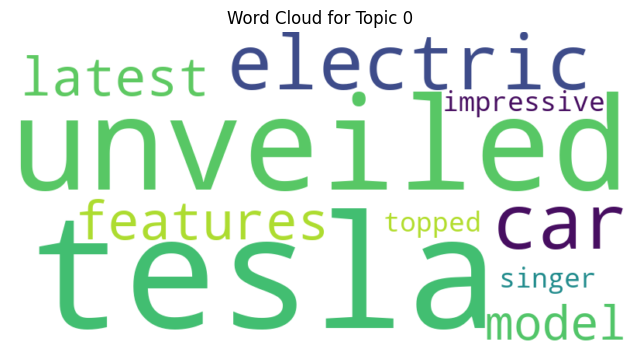

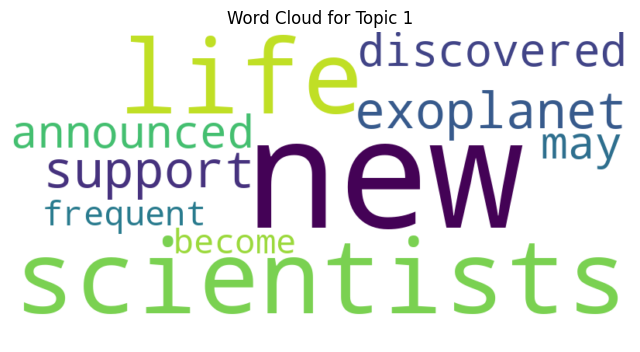

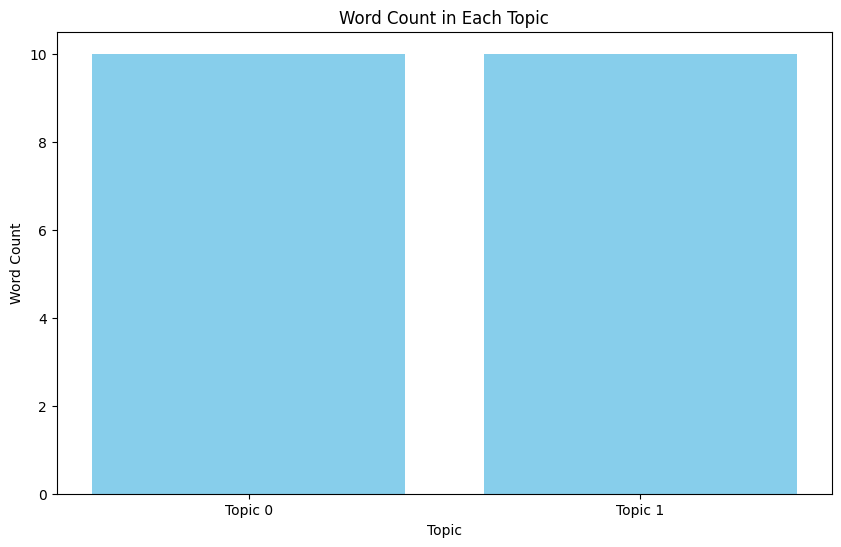

In [9]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.
# Installing necessary libraries
!pip install nltk gensim pyLDAvis matplotlib wordcloud

# Importing required libraries
import nltk
import gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample text data
documents = [
    "The government announced a new initiative to improve healthcare.",
    "Tesla's latest electric car model was unveiled with impressive features.",
    "The upcoming elections are expected to shape the future of the country.",
    "New advances in AI are transforming industries worldwide.",
    "A popular singer released an album that topped the charts immediately.",
    "Research on renewable energy sources is becoming more prominent.",
    "Wildfires have become more frequent due to climate change.",
    "Scientists discovered a new exoplanet that may support life.",
    "The stock market experienced significant fluctuations last week.",
    "Remote work policies are changing the landscape of corporate offices."
]

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess text data
def clean_text(text):
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return cleaned_tokens

# Apply preprocessing to all documents
processed_documents = [clean_text(doc) for doc in documents]

# Create dictionary and corpus for LDA
lda_dictionary = gensim.corpora.Dictionary(processed_documents)
lda_corpus = [lda_dictionary.doc2bow(text) for text in processed_documents]

# LDA Model Training
n_topics = 2  # Adjust the number of topics as needed
lda_model = gensim.models.LdaModel(corpus=lda_corpus, num_topics=n_topics, id2word=lda_dictionary, passes=10)

# Visualization 1: Word Cloud for Each Topic
for topic_id in range(n_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)
    word_frequencies = {word: weight for word, weight in topic_terms}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

    # Display the word cloud for the current topic
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.show()

# Visualization 2: Bar Chart Showing Word Count for Each Topic
topics_data = lda_model.show_topics(formatted=False)
words_per_topic = [len(topic[1]) for topic in topics_data]

plt.figure(figsize=(10, 6))
plt.bar(range(n_topics), words_per_topic, color='skyblue')
plt.xlabel("Topic")
plt.ylabel("Word Count")
plt.title("Word Count in Each Topic")
plt.xticks(range(n_topics), [f"Topic {i}" for i in range(n_topics)])
plt.show()

# Visualization 3: Interactive LDA Visualization
pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, lda_corpus, lda_dictionary)
pyLDAvis.display(lda_visualization)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [11]:
# Write your code here
'''
LDA is unique because it generates high quality results, is simple to use, and effectively separates topics. It can be used effectively in many topic modelling situations, mainly when performance and clarity must need to be balanced.
The greatest option for handling data layers and complexities is BERTopic. It uses word embeddings which allow for more conceptual subjects by syntactically building them but it can be quite resource intensive.
As an exploratory tool, LSA is effective and useful, although it might not be the best for discrete topics. Although it does not define topic edges, it is a suitable lightweight alternative for huge data sets.
In conclusion, LDA and BERTopic typically produce the greatest results. BERtopic excels with more complex data, while LDA is excellent for standard topics.
'''





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nLDA is unique because it generates high quality results, is simple to use, and effectively separates topics. It can be used effectively in many topic modelling situations, mainly when performance and clarity must need to be balanced.\nThe greatest option for handling data layers and complexities is BERTopic. It uses word embeddings which allow for more conceptual subjects by syntactically building them but it can be quite resource intensive.\nAs an exploratory tool, LSA is effective and useful, although it might not be the best for discrete topics. Although it does not define topic edges, it is a suitable lightweight alternative for huge data sets.\nIn conclusion, LDA and BERTopic typically produce the greatest results. BERtopic excels with more complex data, while LDA is excellent for standard topics.\n'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [12]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
This exercise has really boosted my confidence in working with text data and extracting features using different models. While completing this assignment
on time I had to deal with errors like missing packages and installing those packages and some coding errors. But I had managed to solve those problems which
helped me improve my skills and I feel now I am capable of working with text data using these models.





'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nPlease write you answer here:\nThis exercise has really boosted my confidence in working with text data and extracting features using different models. While completing this assignment \non time I had to deal with errors like missing packages and installing those packages and some coding errors. But I had managed to solve those problems which \nhelped me improve my skills and I feel now I am capable of working with text data using these models.\n\n\n\n\n\n'